# Introduction to Geopsatial Data Science

In [8]:
import geopandas as gpd
from shapely import Point, LineString, Polygon
import pandas as pd

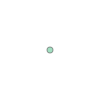

In [9]:
point = Point(1, 1)
point

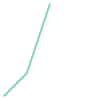

In [10]:
line = LineString([(0, 0), (1, 1), (2, 4)])
line


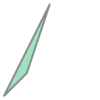

In [11]:
poly = Polygon([(0, 0), (1, 1), (2, 4)])
poly

# Geopandas

In [12]:
df = pd.DataFrame(['geom1','geom2','geom3'],columns = ['name'])
df['geometry'] = [point,line,poly]
example_gdf = gpd.GeoDataFrame(df,geometry='geometry')
example_gdf

,name,geometry
0,geom1,POINT (1 1)
1,geom2,"LINESTRING (0 0, 1 1, 2 4)"
2,geom3,"POLYGON ((0 0, 1 1, 2 4, 0 0))"


In [13]:
example_gdf['length'] = example_gdf.length
example_gdf['area'] = example_gdf.area
example_gdf

,name,geometry,length,area
0,geom1,POINT (1 1),0.000000,0.0
1,geom2,"LINESTRING (0 0, 1 1, 2 4)",4.576491,0.0
2,geom3,"POLYGON ((0 0, 1 1, 2 4, 0 0))",9.048627,1.0


In [14]:
buffered_gdf = gpd.GeoDataFrame(example_gdf[['name','geometry']], geometry = example_gdf.buffer(2))
buffered_gdf['length'] = buffered_gdf.length
buffered_gdf['area'] = buffered_gdf.area
buffered_gdf

,name,geometry,length,area
0,geom1,"POLYGON ((3 1, 2.99037 0.80397, 2.96157 0.6098...",12.561325,12.546194
1,geom2,"POLYGON ((-0.74806 2.08036, 0.10263 4.63246, 0...",21.696998,30.833854
2,geom3,"POLYGON ((-1.78885 0.89443, 0.21115 4.89443, 0...",21.610104,31.644056


### Other geometric operations: https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html

## Projections

A projection is a mathematical transformation the 3D surface of the Earth on a 2D plane.
There are several different types of projections but neither of them perfect. Theres always some kind of distortion in some of these properties: `Area`,`Distance`,`Shape` etc.

The **Coordinate Reference System (crs)** is used to map the locations to analyzable geometries, through some kind of projection (or none at all).

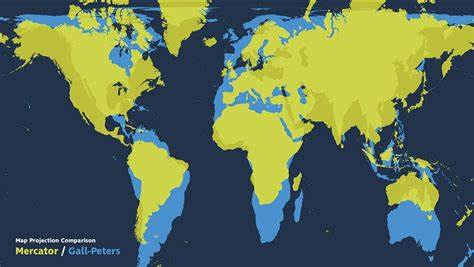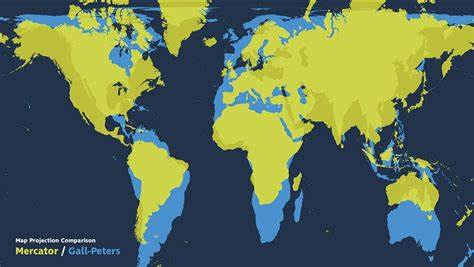


## Examples

### WGS 84 - EPSG:4326 crs

Widely used crs, without any projections, it's not very accurate

### EOV - Egységes Országos Vetület - EPSG:23700 crs

crs with projection, tailored to Hungary, highly precise for this specific country.

In [15]:
import random

# Bounding box from which we will sample coordinates
min_lon, max_lon = 18.9, 19.3
min_lat, max_lat = 47.4, 47.6

# Generate 10 random points within the box
points = []
for _ in range(10):
    lon = random.uniform(min_lon, max_lon)
    lat = random.uniform(min_lat, max_lat)
    points.append(Point(lon, lat))

# Create GeoDataFrame in WGS84
gdf_wgs84 = gpd.GeoDataFrame(geometry=points, crs="EPSG:4326")

# Reproject to EOV
gdf_eov = gdf_wgs84.to_crs("EPSG:23700")

In [16]:
gdf_wgs84, gdf_eov

(                    geometry
 0  POINT (19.11178 47.40442)
 1   POINT (19.03591 47.5476)
 2  POINT (18.90537 47.50329)
 3   POINT (19.1547 47.46236)
 4  POINT (19.25272 47.56038)
 5  POINT (19.13111 47.56074)
 6  POINT (18.95571 47.51267)
 7  POINT (18.97451 47.59746)
 8   POINT (19.2125 47.43597)
 9  POINT (19.00681 47.54465),
                         geometry
 0  POINT (654855.344 228939.259)
 1  POINT (649132.009 244854.758)
 2  POINT (639296.378 239938.055)
 3  POINT (658086.373 235384.031)
 4   POINT (665447.924 246296.18)
 5  POINT (656296.512 246318.951)
 6  POINT (643090.013 240975.114)
 7  POINT (644515.682 250401.085)
 8  POINT (662450.058 232457.248)
 9  POINT (646941.208 244527.224))

In [17]:
gdf_eov.explore()

# Graph representation of the city

C:\Users\Tarnoczi Kati\AppData\Local\Temp\ipykernel_18472\3258414464.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf.geometry.unary_union


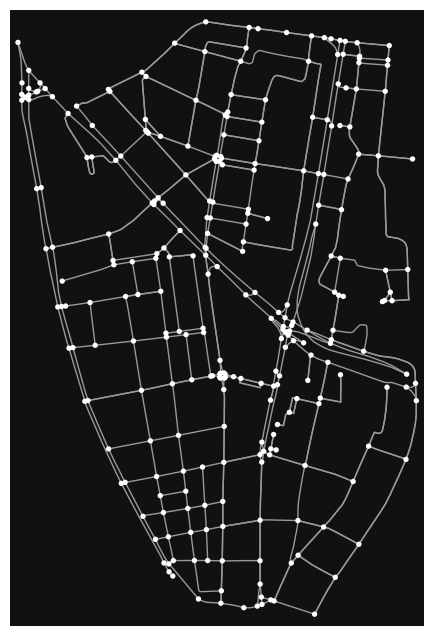

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [18]:
import osmnx as ox

# Get geometry of Budapest
gdf = ox.geocode_to_gdf("Budapest, Óbuda")
polygon = gdf.geometry.unary_union

# Download street network using this polygon
G = ox.graph_from_polygon(polygon, network_type="drive")

# Plot the graph
ox.plot_graph(G)

In [19]:
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)
gdf_nodes.head(5)

,y,x,street_count,highway,geometry
osmid,,,,,
36684619,47.538505,19.031862,4,NaN,POINT (19.03186 47.5385)
41484935,47.545158,19.029696,3,NaN,POINT (19.0297 47.54516)
41484952,47.548046,19.029120,5,NaN,POINT (19.02912 47.54805)
48826114,47.541444,19.030637,4,NaN,POINT (19.03064 47.54144)
48826515,47.537206,19.039910,3,NaN,POINT (19.03991 47.53721)


In [27]:
gdf_edges.head()

osmid       highway  \
u        v         key                                                    
36684619 262189214 0               [451432224, 364852869]     secondary   
         262189217 0                            364852870  unclassified   
         284226490 0                           1080526798   residential   
41484935 261590720 0    [554954044, 554954045, 548012566]     secondary   
         261592023 0                            819849797   residential   

                         lanes maxspeed           name  oneway reversed  \
u        v         key                                                    
36684619 262189214 0         2       50       Bécsi út    True    False   
         262189217 0         2       50  Kiscelli utca   False     True   
         284226490 0       NaN       30  Kiscelli utca   False    False   
41484935 261590720 0    [2, 3]       50       Bécsi út    True    False   
         261592023 0         3       50            NaN   False     True   

                            length  \
u        v         key               
36684619 262189214 0    191.192987   
         262189217 0     11.136760   
         284226490 0    189.056890   
41484935 261590720 0    309.528218   
         261592023 0     15.836583   

                                                                 geometry  \
u        v         key                                                      
36684619 262189214 0    LINESTRING (19.03186 47.5385, 19.03181 47.5386...   
         262189217 0    LINESTRING (19.03186 47.5385, 19.03181 47.5385...   
         284226490 0    LINESTRING (19.03186 47.5385, 19.03194 47.5385...   
41484935 261590720 0    LINESTRING (19.0297 47.54516, 19.02967 47.5452...   
         261592023 0    LINESTRING (19.0297 47.54516, 19.02962 47.5451...   

                        ref bridge junction tunnel width access  
u        v         key                                           
36684619 262189214 0    NaN    NaN      NaN    NaN   NaN    NaN  
         262189217 0    NaN    NaN      NaN    NaN   NaN    NaN  
         284226490 0    NaN    NaN      NaN    NaN   NaN    NaN  
41484935 261590720 0    NaN    NaN      NaN    NaN   NaN    NaN  
         261592023 0    NaN    NaN      NaN    NaN   NaN    NaN

# Network statistics

Calculate geometric and topological network measures 


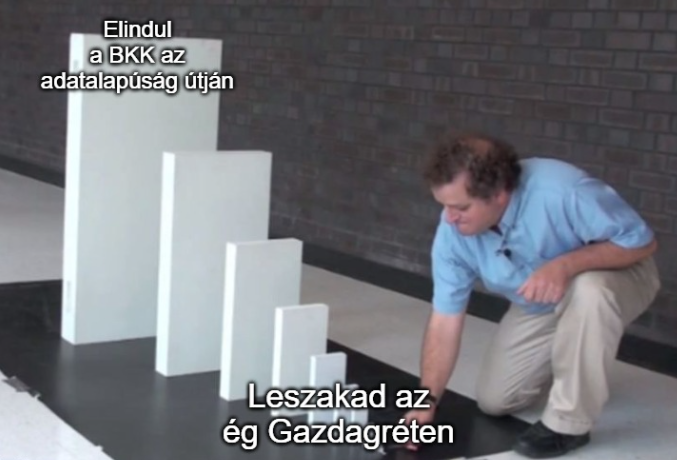

In [23]:
# what sized area does our network cover in square meters?
G_proj = ox.projection.project_graph(G,to_crs='epsg:23700')
nodes_proj = ox.convert.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.union_all().convex_hull.area
graph_area_m

2234066.5857597906

In [31]:
# show some basic stats about the network
stats = ox.stats.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)
pd.Series(stats)

n                                                                              281
m                                                                              604
k_avg                                                                     4.298932
edge_length_total                                                     57390.487123
edge_length_avg                                                          95.017363
streets_per_node_avg                                                      3.217082
streets_per_node_counts                   {0: 0, 1: 13, 2: 5, 3: 176, 4: 82, 5: 5}
streets_per_node_proportions     {0: 0.0, 1: 0.046263345195729534, 2: 0.0177935...
intersection_count                                                             268
street_length_total                                                   40478.110328
street_segment_count                                                           434
street_length_avg                                                        93.267535
circ

# Centrality
Closeness centrality is a measure in graph theory that quantifies how close a node is to all other nodes in a network.

other centrality measures: https://networkx.org/documentation/stable/reference/algorithms/centrality.html

In [29]:
# convert graph to line graph so edges become nodes and vice versa
import networkx as nx
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

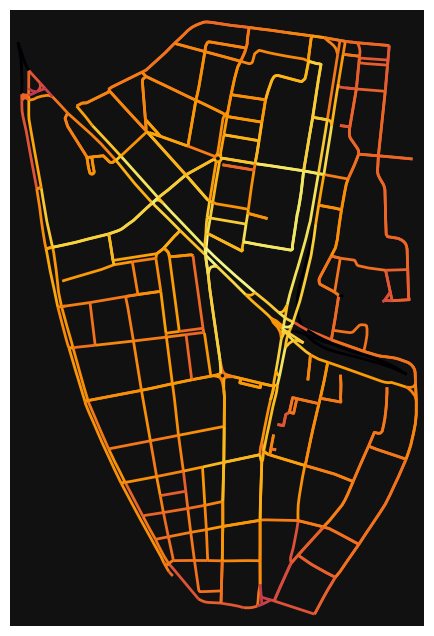

In [30]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)